In [14]:
import wandb
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

img_name = "icml_overall_" + datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S")

entity = "ocrl_benchmark"
project = "agent-learning"
default_tags = ["toplot", "sparserewtype", "hardmode"]

# envs
envs = [
        [
            "oddoneoutN4C2S2S1oc",
            "oddoneoutN4C3S2S1oc",
            "oddoneoutN4C2S3S1oc",
            "oddoneoutN4C4S3S2oc",
        ],
        [
            "oddoneoutN4C2S2S1",
            "oddoneoutN4C3S2S1",
            "oddoneoutN4C2S3S1",
            "oddoneoutN4C4S3S2",
        ]
]
envs = np.array(envs)

# titles
titles = [
        [
            "Obj. Comp. (2Colors, 2Shapes, 1Size)",
            "Obj. Comp. (3Colors, 2Shapes, 1Size)",
            "Obj. Comp. (2Colors, 3Shapes, 1Size)",
            "Obj. Comp. (4Colors, 3Shapes, 2Sizes)",
        ],
        [
            "Prop. Comp. (2Colors, 2Shapes, 1Size)",
            "Prop. Comp. (3Colors, 2Shapes, 1Size)",
            "Prop. Comp. (2Colors, 3Shapes, 1Size)",
            "Prop. Comp. (4Colors, 3Shapes, 2Sizes)",
        ],
]

# colormap
cm = plt.cm.get_cmap("tab20").colors
# models
models = {
    "GT": {
        "tags": ["gt"],
        "line_cm": cm[2],
        "range_cm": cm[3],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "SLATE": {
        "tags": ["slate"],
        "line_cm": cm[16],
        "range_cm": cm[17],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    }

}
print(f"Models: {models.keys()}")

api = wandb.Api(timeout=19)
results = {}
for i in range(envs.shape[0]):
    for j in range(envs.shape[1]):
        print(envs[i, j])
        for model_name, model_infos in models.items():
            filters = []
            filters.append({"tags": envs[i,j]})
            for model_tag in model_infos["tags"]:
                filters.append({"tags": model_tag})
            for default_tag in default_tags:
                filters.append({"tags": default_tag})
            print(filters)
            if not model_name in results.keys():
                results[model_name] = {}
            runs = api.runs(f"{entity}/ocrl-exp-res", filters={"$and": filters})
            global_steps = []
            wall_times = []
            success_rates = []
            for run in runs:
                print(run)
                history = run.scan_history(["global_step","_timestamp","eval/success_rate"])
                _global_step = []
                _wall_times = []
                _success_rate = []
                for row in history:
                    _global_step.append(row["global_step"])
                    _wall_times.append(row["_timestamp"])
                    _success_rate.append(row["eval/success_rate"])
                global_steps.append(_global_step)
                wall_times.append(_wall_times)
                success_rates.append(_success_rate)
            if len(global_steps) == 0:  # no logs
                continue
            step = 2000000 // 4000 # plotting to 2000000 steps
            min_step_idx = 100
            min_step = 2000000
            # success rates
            for rate_idx in range(len(success_rates)):
                success_rates[rate_idx] = success_rates[rate_idx][:step]
                if min_step > len(success_rates[rate_idx]):
                    min_step_idx = rate_idx
                    min_step = len(success_rates[rate_idx])
            sr_steps = global_steps[min_step_idx][:min_step]
            sr_wall_times = [wall_time[:min_step] for wall_time in wall_times][-1]
            success_rates = [success_rate[:min_step] for success_rate in success_rates]
            sr_mean = np.mean(success_rates, axis=0)
            sr_std = np.std(success_rates, axis=0)
            results[model_name][envs[i,j]] = {
                "step": sr_steps,
                "walltime": sr_wall_times,
                "mean": sr_mean,
                "std": sr_std
            }

Models: dict_keys(['GT', 'SLATE'])
oddoneoutN4C2S2S1oc
[{'tags': 'oddoneoutN4C2S2S1oc'}, {'tags': 'gt'}, {'tags': 'toplot'}, {'tags': 'sparserewtype'}, {'tags': 'hardmode'}]
<Run ocrl_benchmark/ocrl-exp-res/k2yj4fus (finished)>
<Run ocrl_benchmark/ocrl-exp-res/241wk6k7 (finished)>
<Run ocrl_benchmark/ocrl-exp-res/3az9t1q6 (finished)>
[{'tags': 'oddoneoutN4C2S2S1oc'}, {'tags': 'slate'}, {'tags': 'toplot'}, {'tags': 'sparserewtype'}, {'tags': 'hardmode'}]
<Run ocrl_benchmark/ocrl-exp-res/3lkk3c1h (finished)>
<Run ocrl_benchmark/ocrl-exp-res/3h5nw8r8 (finished)>
<Run ocrl_benchmark/ocrl-exp-res/qg5gsaxi (finished)>
oddoneoutN4C3S2S1oc
[{'tags': 'oddoneoutN4C3S2S1oc'}, {'tags': 'gt'}, {'tags': 'toplot'}, {'tags': 'sparserewtype'}, {'tags': 'hardmode'}]
<Run ocrl_benchmark/ocrl-exp-res/31xk5ch9 (finished)>
<Run ocrl_benchmark/ocrl-exp-res/x6xw9pjc (finished)>
<Run ocrl_benchmark/ocrl-exp-res/nryizef4 (finished)>
[{'tags': 'oddoneoutN4C3S2S1oc'}, {'tags': 'slate'}, {'tags': 'toplot'}, {'tags

In [12]:
import json
with open("results/slate_gt_harder_comparison_tasks.json", "w") as f:
    json.dump(results, f)

model names: dict_keys(['GT', 'SLATE'])
envs: dict_keys(['oddoneoutN4C2S2S1oc', 'oddoneoutN4C3S2S1oc', 'oddoneoutN4C2S3S1oc', 'oddoneoutN4C4S3S2oc', 'oddoneoutN4C2S2S1', 'oddoneoutN4C3S2S1', 'oddoneoutN4C2S3S1', 'oddoneoutN4C4S3S2'])


oddoneoutN4C2S2S1oc
dict_keys(['oddoneoutN4C2S2S1oc', 'oddoneoutN4C3S2S1oc', 'oddoneoutN4C2S3S1oc', 'oddoneoutN4C4S3S2oc', 'oddoneoutN4C2S2S1', 'oddoneoutN4C3S2S1', 'oddoneoutN4C2S3S1', 'oddoneoutN4C4S3S2'])
dict_keys(['oddoneoutN4C2S2S1oc', 'oddoneoutN4C3S2S1oc', 'oddoneoutN4C2S3S1oc', 'oddoneoutN4C4S3S2oc', 'oddoneoutN4C2S2S1', 'oddoneoutN4C3S2S1', 'oddoneoutN4C2S3S1', 'oddoneoutN4C4S3S2'])
oddoneoutN4C2S2S1oc
oddoneoutN4C3S2S1oc
dict_keys(['oddoneoutN4C2S2S1oc', 'oddoneoutN4C3S2S1oc', 'oddoneoutN4C2S3S1oc', 'oddoneoutN4C4S3S2oc', 'oddoneoutN4C2S2S1', 'oddoneoutN4C3S2S1', 'oddoneoutN4C2S3S1', 'oddoneoutN4C4S3S2'])
dict_keys(['oddoneoutN4C2S2S1oc', 'oddoneoutN4C3S2S1oc', 'oddoneoutN4C2S3S1oc', 'oddoneoutN4C4S3S2oc', 'oddoneoutN4C2S2S1', 'oddoneoutN4C3S2S1', 'oddoneoutN4C2S3S1', 'oddoneoutN4C4S3S2'])
oddoneoutN4C3S2S1oc
oddoneoutN4C2S3S1oc
dict_keys(['oddoneoutN4C2S2S1oc', 'oddoneoutN4C3S2S1oc', 'oddoneoutN4C2S3S1oc', 'oddoneoutN4C4S3S2oc', 'oddoneoutN4C2S2S1', 'oddoneoutN4C3S2S1', 'od

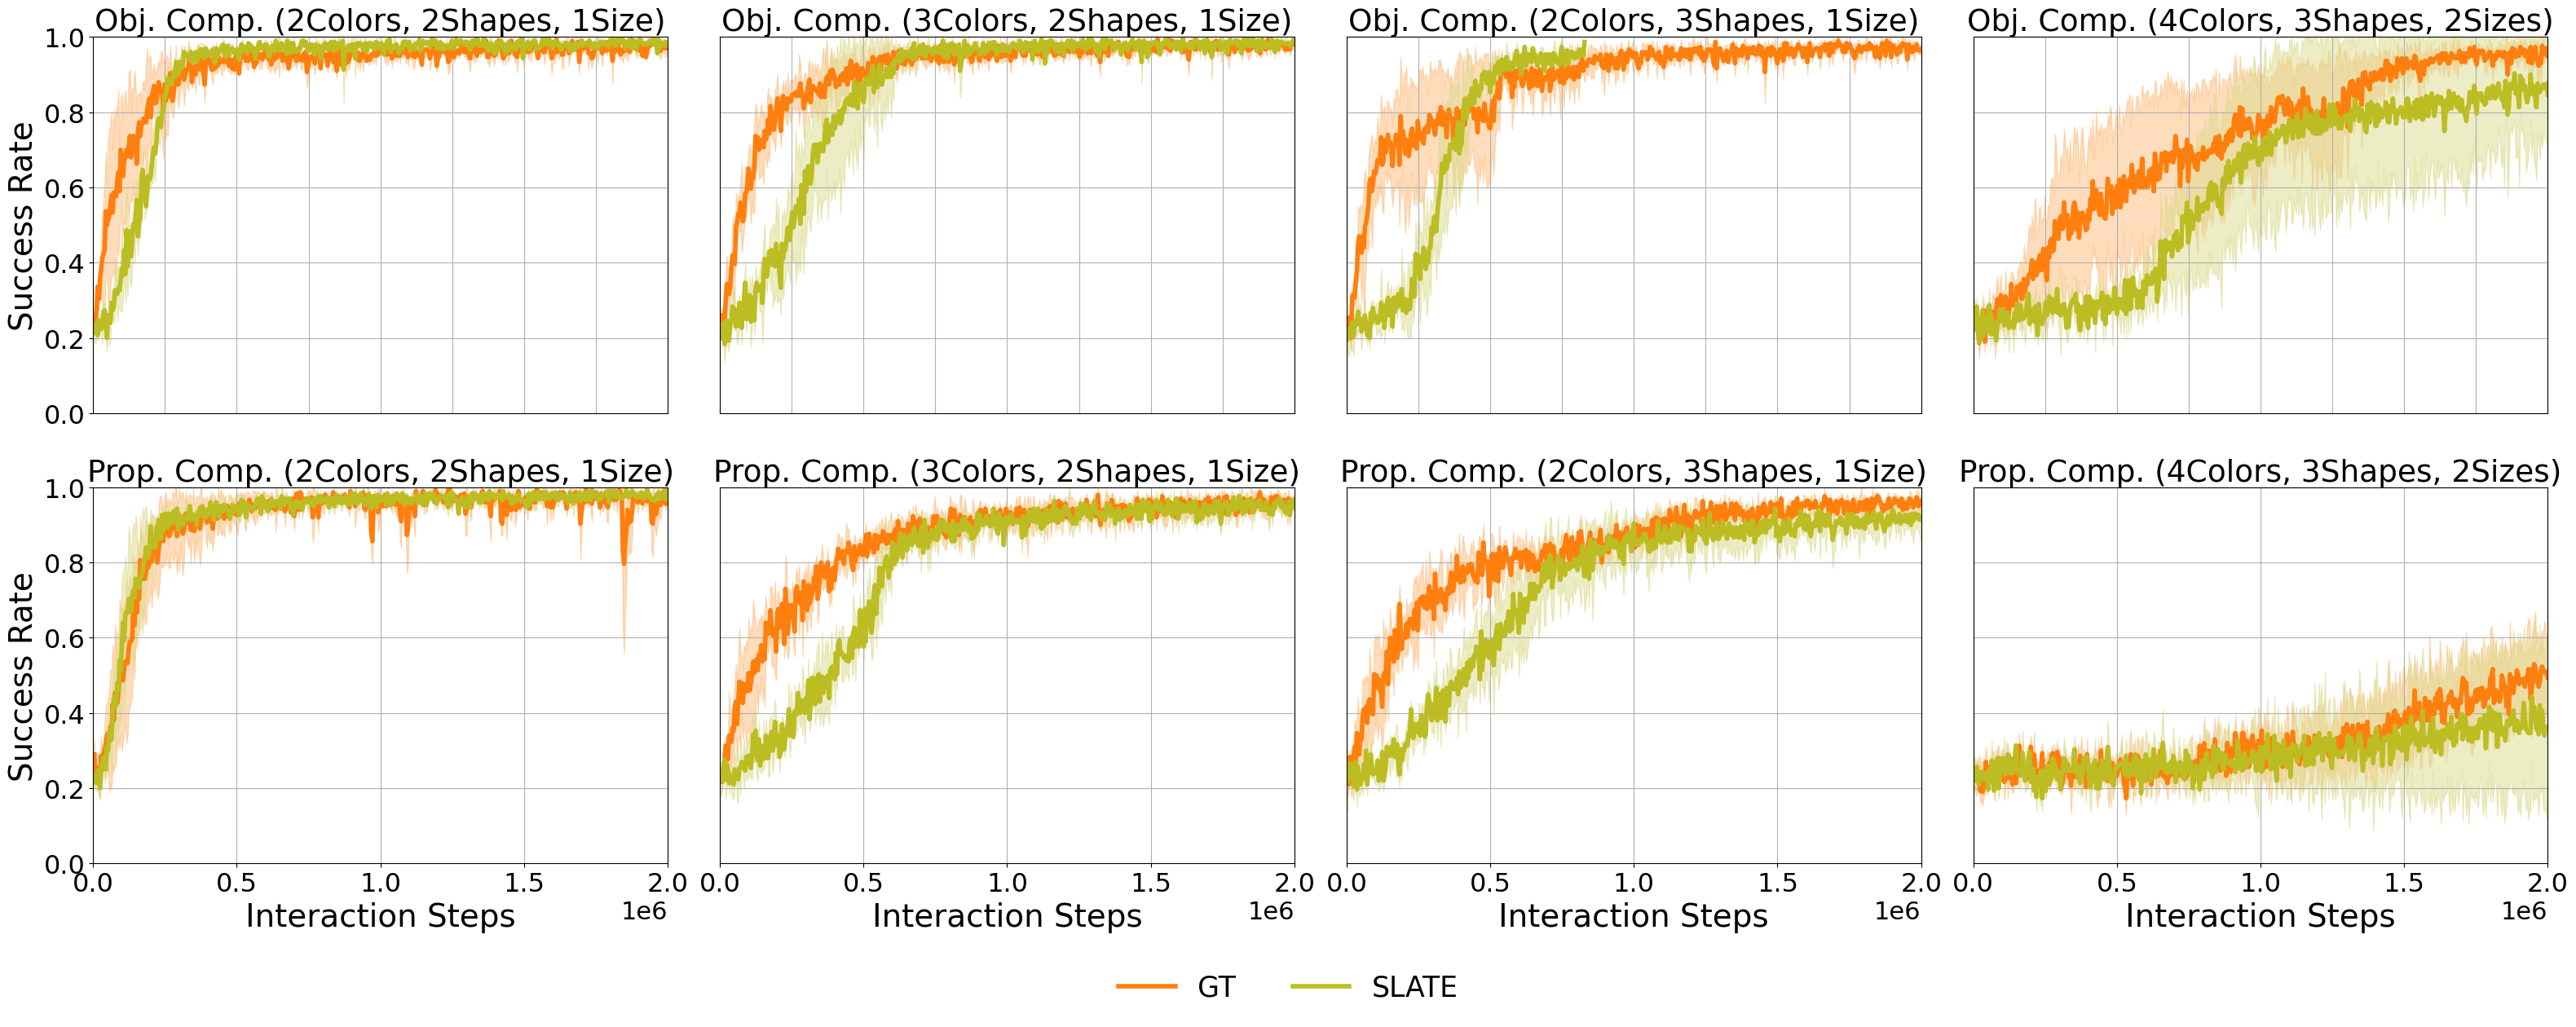

In [22]:
# plots
top = 0.06
hspace = 0.07
bottom = 0.16 if envs.shape[0] != 1 else 0.36
height = (1 - top - bottom - hspace * (envs.shape[0] - 1)) / envs.shape[0]
left = 0.04
wspace = 0.02
#wspace = 0.07
right = 0.019
width = (1 - left - right - wspace * (envs.shape[1] - 1)) / envs.shape[1]
recs = np.zeros(envs.shape, dtype=object)
for i in range(recs.shape[0]):
    for j in range(recs.shape[1]):
        recs[i, j] = [
            left + j * (width + wspace),  # left
            bottom + (recs.shape[0] - 1 - i) * (height + hspace),  # bottom
            width,
            height,
        ]
plt.figure(figsize=(8 * recs.shape[1], 6.5 * recs.shape[0]))

for i in range(envs.shape[0]):
    for j in range(envs.shape[1]):
        print(envs[i, j])
        ax = plt.axes(recs[i, j])
        for model_name, model_infos in models.items():
            print(results[model_name].keys())
            sr_steps = results[model_name][envs[i,j]]["step"]
            sr_mean = results[model_name][envs[i,j]]["mean"]
            sr_std = results[model_name][envs[i,j]]["std"]
            (line,) = ax.plot(
                sr_steps,
                sr_mean,
                color=model_infos["line_cm"],
                label=model_name,
                linewidth=4,
            )
            plt.fill_between(
                sr_steps,
                sr_mean - sr_std,
                sr_mean + sr_std,
                color=model_infos["range_cm"],
                alpha=0.5,
            )
            models[model_name]["line"] = line
        ax.grid(True)
        ax.xaxis.offsetText.set_fontsize(22)
        axes = plt.gca()
        ax.set_ylim([0.0, 1.0])
        print(envs[i,j])
        ax.set_xlim([0.0, 2e6])
        plt.yticks(fontsize=23)
        if j == 0:
            ax.set_ylabel("Success Rate", fontsize=28)
        else:
            ax.yaxis.set_ticklabels([])
            ax.yaxis.set_ticks_position("none")
        if i == envs.shape[0] - 1:
            plt.xticks([0, 500000, 1000000, 1500000, 2000000], fontsize=23)
            ax.set_xlabel("Interaction Steps", fontsize=28) 
        else:
            ax.xaxis.set_ticklabels([])
            ax.xaxis.set_ticks_position("none")
        ax.set_title(titles[i][j], fontsize=27)

legended = []
for key in models.keys():
    if "line" in models[key].keys():
        legended.append(models[key]["line"])
plt.figlegend(
    loc="lower center",
    #ncol=len(models.keys())//3,
    ncol=4,
    fontsize=25,
    #fontsize=23,
    frameon=False,
    handles=legended,
)            

img_name = "icml_plot_stress_" + datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S")
plt.savefig(img_name + ".png", dpi=100)